<a href="https://colab.research.google.com/github/SivWebProjects/PythonTaskFiles/blob/master/detecting_asan_human_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages

In [ ]:
import mediapipe as mp
import cv2
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.svm import SVC

Initialize the Pose Detection Model

In [ ]:
# Initialize the media pipe pose main class.
# Stored the instance of pose detection class in mp_pose variable
mp_pose = mp.solutions.pose
# Setup the Pose function for images independently for the images standalone processing.
# mp_pose will use to call the Pose method.
pose = mp_pose.Pose(static_image_mode=True)
# Initialize mediapipe drawing class to draw the landmarks points. 
# It draw keypoints
mp_draw = mp.solutions.drawing_utils 
# Detect 33 Landmarks
points = mp_pose.PoseLandmark 

Print 33 keypoint names

In [ ]:
print(len(points))
for i in points:
    print(i)

33
PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


Create an empty Pandas data frame and enter the columns

In [ ]:
data = []
for p in points:
        x = str(p)[13:] # Takes PoseLandmark object characters from 13 to end
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")
# Dependent variable       
data.append("OUTPUT") 
data = pd.DataFrame(columns = data) 
print(data.shape)

(0, 133)


Extract keypoints from each image and store them in respective columns

In [ ]:
count = 0
img_count = 0
# train dataset path
folder_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/train/tree" 
# csv file path
csv_file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset_2/yoga_data_csv_files/yoga_tree_data.csv" 

# listdir() method in python is used to get the list of all files and directories in the specified directory.
# Loop over each image
for img_path in os.listdir(folder_path):
    temp = []
    new_path = str(path) + "/" + str(img_path)
    print(new_path)
    img = cv2.imread(path + "/" + img_path)
    img_count += 1
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    results = pose.process(imgRGB)
    print(results.pose_landmarks)
    if results.pose_landmarks:
        # Access data from landmark dictionary
        landmarks = results.pose_landmarks.landmark 
        for i,j in zip(points,landmarks):
                temp = temp + [j.x, j.y, j.z, j.visibility] 
        data.loc[count] = temp + [4]
        count +=1
        print(count)
print(img_count)
# Append data into the csv file
data.to_csv(csv_file_path) 

Create a CSV File

In [ ]:
file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
# Create a new csv file
new_file = open(file_path, 'x')

Combine the data from five asanas and save it in a csv file

In [ ]:
file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
folder_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_data_csv_files"
# chdir() change the current working directory to specified path.
os.chdir(folder_path)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
# Combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# Export to csv
combined_csv.to_csv(file_path, index=False)

['yoga_plank_data_2.csv', 'yoga_goddess_data_2.csv', 'yoga_downdog_data_2.csv', 'yoga_warrior2_data_2.csv', 'yoga_tree_data_2.csv']


Import the dataset

In [ ]:
csv_file_path = "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/yoga_5_poses_data.csv"
data = pd.read_csv(csv_file_path)
x, y = data.iloc[:,:132], data['OUTPUT']

Training the Support Vector Machine model on the imported dataset

In [ ]:
model = SVC(kernel = 'poly')
model.fit(x, y)

SVC(kernel='poly')

Prediction on a single image

In [ ]:
def detect_pose(image, pose):
    """
     It will perform the pose detection on the person who is 
     closely associated with the image and draw all the landmarks 
     points in the pose which will be detected in the image.
     Arguments:
        image: The image in which the person is there to be detected.
        pose: The pose function which we created for the image
    
    Output:
        image(array): input image
        image_copy(array): contains name of the yoga pose detected on the input image
        blackie_image(array): blackie image with the landmarks points which were 
                      detected in the person’s pose and yoga name
        asana(str): name of the yoga pose
    """
    image_copy = image.copy()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    blackie_image = np.zeros(image.shape)
    resultant = pose.process(image)
    temp = []
    if resultant.pose_landmarks:  
        landmarks = resultant.pose_landmarks.landmark
        # Extract 33 keypoints of an image
        for j in landmarks:
                temp = temp + [j.x, j.y, j.z, j.visibility]
        y = model.predict([temp])
        if y == 0:
            asan = "downdog"
        elif y == 1:
            asan = "warrior2"
        elif y == 2:
            asan = "plank"
        elif y == 3:
            asan = "goddess"
        else:
            asan = "tree"
            
        mp_draw.draw_landmarks(image=blackie_image, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_draw.DrawingSpec(color=(0,0,255),
                                                                            thickness=3, circle_radius=3),
                                  connection_drawing_spec=mp_draw.DrawingSpec(color=(0,255,0),
                                                                              thickness=2, circle_radius=2))
    return (image, image_copy, blackie_image, asan)

In [ ]:
# Read the image from the specified path to detect the pose
images_path = ["/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/downdog/00000101.jpg", 
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/plank/00000028.jpg", 
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/warrior2/00000102.jpg",
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/goddess/00000058.jpg",
               "/home/neosoft/Documents/CSVFiles/yoga_poses_dataset/test/tree/00000045.jpg"]
# Read image using opencv
results = []
length = len(images_path)
for i in range(length):
    image = cv2.imread(images_path[i])
    result = detect_pose(image, pose)
    results.append(result)
[ ]
model = SVC(kernel = 'poly')model.fit(x, y)
￼
SVC(kernel='poly')

In [ ]:
def display_images(result):
    image, image_copy, blackie_image, asana = result[0:]
    plt.figure(figsize=[30,10])
    plt.subplot(131);
    plt.imshow(image);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Input Image");
    plt.axis('off');
    plt.subplot(132);
    cv2.putText(image_copy, asana, (150,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (15,255,124), 3)
    plt.imshow(image_copy[:,:,::-1]);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Asana Detected Image");
    plt.axis('off');
    plt.subplot(133);
    cv2.putText(blackie_image, asana, (150,150), cv2.FONT_HERSHEY_SIMPLEX, 2, (15,255,124), 3)
    plt.imshow(blackie_image[:,:,::-1]);
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title("Pose and Asana Detected Image");
    plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


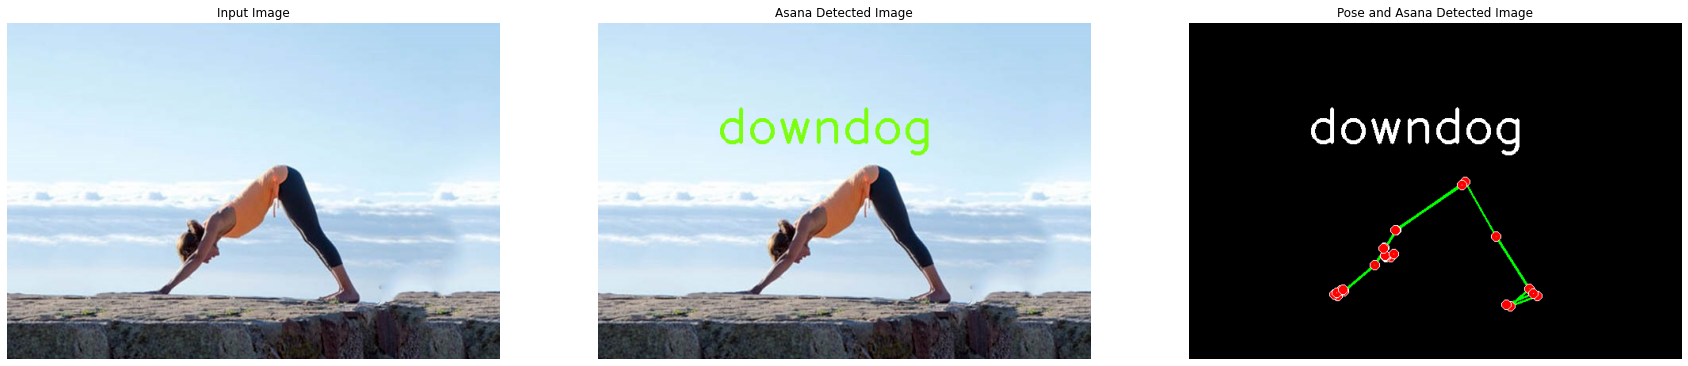

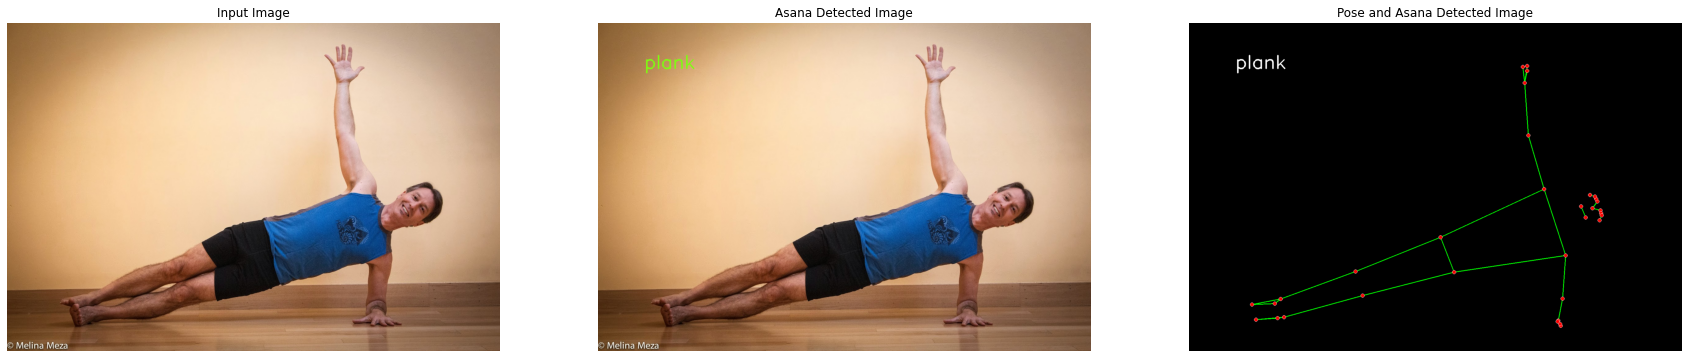

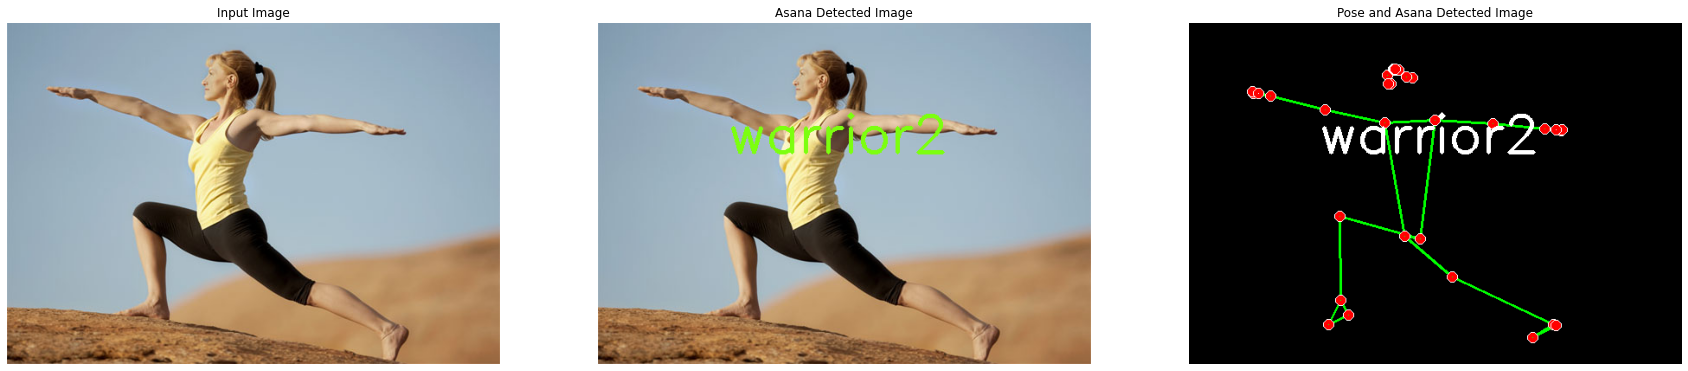

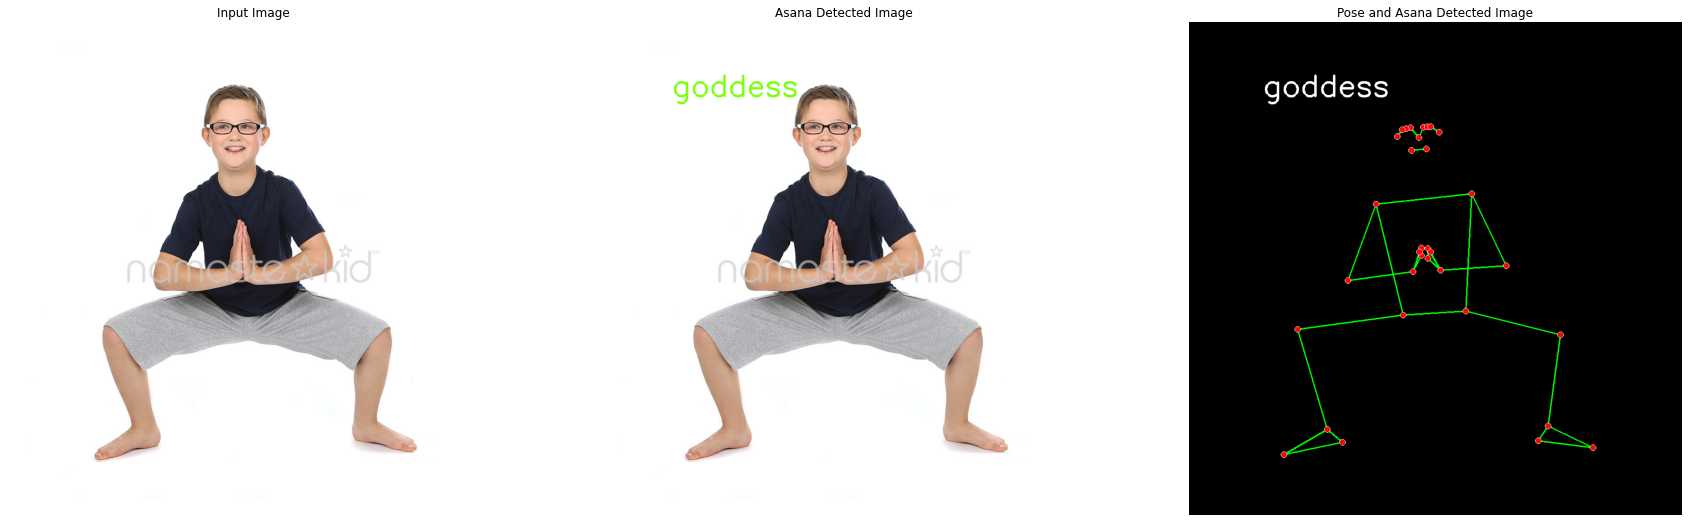

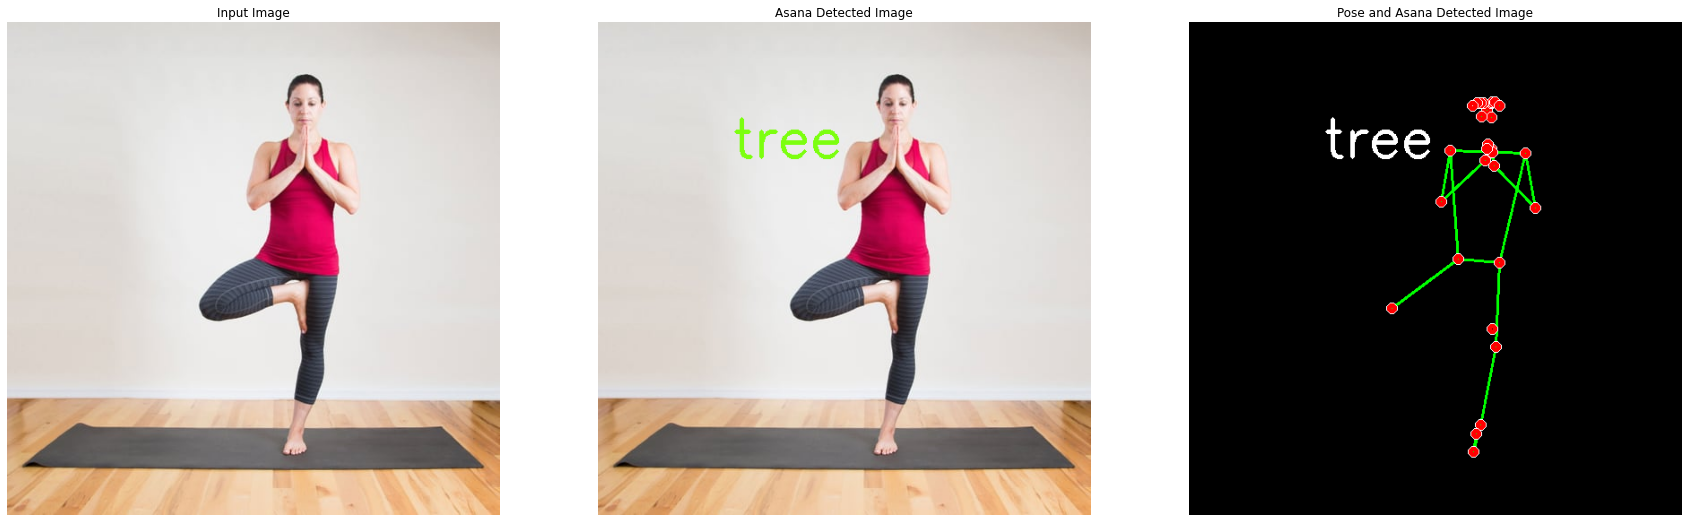

In [ ]:
for i in range(length):
    display_images(results[i])